## Example 2. calculate torsion angles and scalar couplings. 

Here we calculate torsion angles and scalar couplings of a trajectory.



In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# import barnaba
import barnaba as bb

# define trajectory and topology files
traj = "../test/data/UUCG.xtc"
top = "../test/data/UUCG.pdb"
native="uucg2.pdb"

angle = ["chi"]
residue = ["G_6_0"]
# calculate chi only for G_6. If angle and/or residue are not specified, all torsion angles
# alpha, beta, gamma, delta, epsilon, zeta, chi are calculated

angles_b,rr = bb.backbone_angles(traj,topology=top,angles=angle, residues= residue)



# Loading ../test/data/UUCG.xtc 


Now we create the histogram

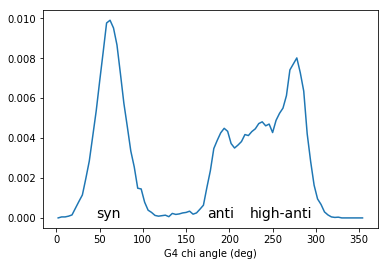

In [4]:
# move from -pi,pi to 0-2pi range
aa = np.copy(angles_b)
aa[np.where(aa<0.0)] += 2.*np.pi

# from radians to deg
aa *= 180.0/np.pi

# create historgram 
bins = np.arange(0,360,4)
hh,ee = np.histogram(aa[:,0,0],normed=True,bins=bins)

# make plot
plt.plot(0.5*(ee[1:]+ee[:-1]),hh)
plt.xlabel("G4 chi angle (deg)")
plt.text(60,0,"syn",fontsize=14,ha='center')
plt.text(190,0,"anti",fontsize=14,ha='center')
plt.text(260,0,"high-anti",fontsize=14,ha='center')

We can also calculate sugar torsion angles v0, v1, v2, v3 and v4. This time we do it for C5

In [5]:

residue = ["C_5_0"]
# calculate sugar angles for C_5. If angles is not specified, all 
# torsion angles in the sugar v0, v1, v2, v3, v4 are calculated

angles_s,rr = bb.sugar_angles(traj,topology=top, residues= residue)
print angles_s.shape


# Loading ../test/data/UUCG.xtc 


(20001, 1, 5)


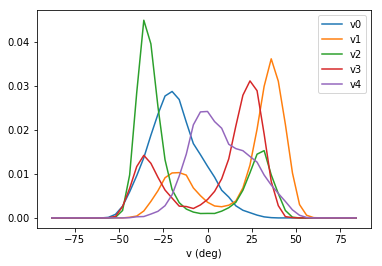

In [6]:
aa1 = np.copy(angles_s)

# from radians to deg
aa1 *= 180.0/np.pi

bins = np.arange(-90,90,4)
for j in range(5):
    hh,ee = np.histogram(aa1[:,0,j],normed=True,bins=bins)
    # make plot
    plt.plot(0.5*(ee[1:]+ee[:-1]),hh,label="v%d"%j)
    
plt.legend()
plt.xlabel("v (deg)")

It is probably easier to interpret data using phase and and amplitude:

In [7]:
residue = ["C_5_0"]
# calculate sugar angles for C_5. If angles is not specified, all 
# torsion angles in the sugar v0, v1, v2, v3, v4 are calculated

angles_p,rr = bb.pucker_angles(traj,topology=top, residues= residue)



# Loading ../test/data/UUCG.xtc 


([], <a list of 0 Text yticklabel objects>)

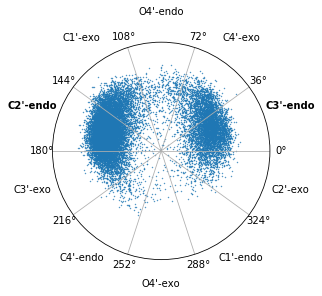

In [17]:
aa2 = np.copy(angles_p)

# from radians to deg
ax = plt.subplot(111, polar=True)
c = plt.scatter(aa2[:,0,0], aa2[:,0,1],s=0.15)
p3 = np.pi/5
plt.ylim(0,1.2)
xt = np.arange(0,2*np.pi,p3)
plt.text(0.5*p3,1.5,"C3'-endo",ha='center',fontweight='bold')
plt.text(1.5*p3,1.5,"C4'-exo",ha='center')
plt.text(2.5*p3,1.5,"O4'-endo",ha='center')
plt.text(3.5*p3,1.5,"C1'-exo",ha='center')
plt.text(4.5*p3,1.5,"C2'-endo",ha='center',fontweight='bold')
plt.text(5.5*p3,1.5,"C3'-exo",ha='center')
plt.text(6.5*p3,1.5,"C4'-endo",ha='center')
plt.text(7.5*p3,1.5,"O4'-exo",ha='center')
plt.text(8.5*p3,1.5,"C1'-endo",ha='center')
plt.text(9.5*p3,1.5,"C2'-exo",ha='center')
plt.xticks(xt)
plt.yticks([])